In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import datetime as dt

In [25]:
%load_ext autoreload

In [26]:
%autoreload 2

## Get emoncms feeds

In [75]:
import emoncmsfeed as getfeeds

In [76]:
dataframefreq = '10min'

feeds =  { 'T_ext':2, 'T_int':3 }

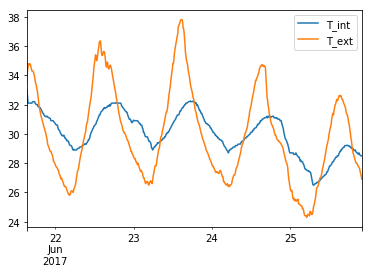

In [77]:
df = getfeeds.builddataframe( feeds, dataframefreq )
df.plot();

## Get weather

In [88]:
import weatherfeed as wf

In [89]:
coords_grenoble = ( 45.166672, 5.71667 ) 

In [92]:
df.index[-1]

Timestamp('2017-06-25 21:50:00', freq='10T')

In [90]:
startday, lastday = df.index[0], df.index[-1]

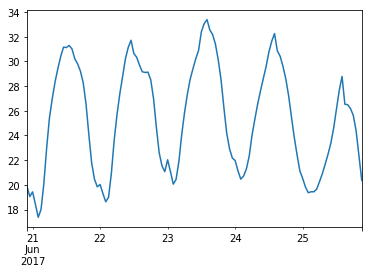

In [91]:
allweatherdata = wf.buildmultidayDF(startday, lastday, coords_grenoble )

allweatherdata['temperature'].plot()

In [94]:
allweatherdata = allweatherdata.resample(dataframefreq).interpolate()

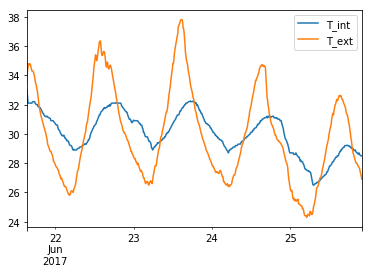

In [95]:
df.plot()

In [96]:
alldata = pd.concat( [df, allweatherdata ], axis=1 )

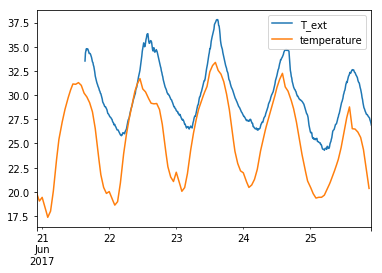

In [98]:
alldata[['T_ext', 'temperature']].plot()

In [101]:
pd.to_datetime('now')

Timestamp('2017-06-26 15:48:34')

In [103]:
pd.to_datetime( dt.datetime.now() )

Timestamp('2017-06-26 17:49:16.886418')

In [105]:
now = dt.datetime.now()